In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.io import arff
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import os, shutil
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

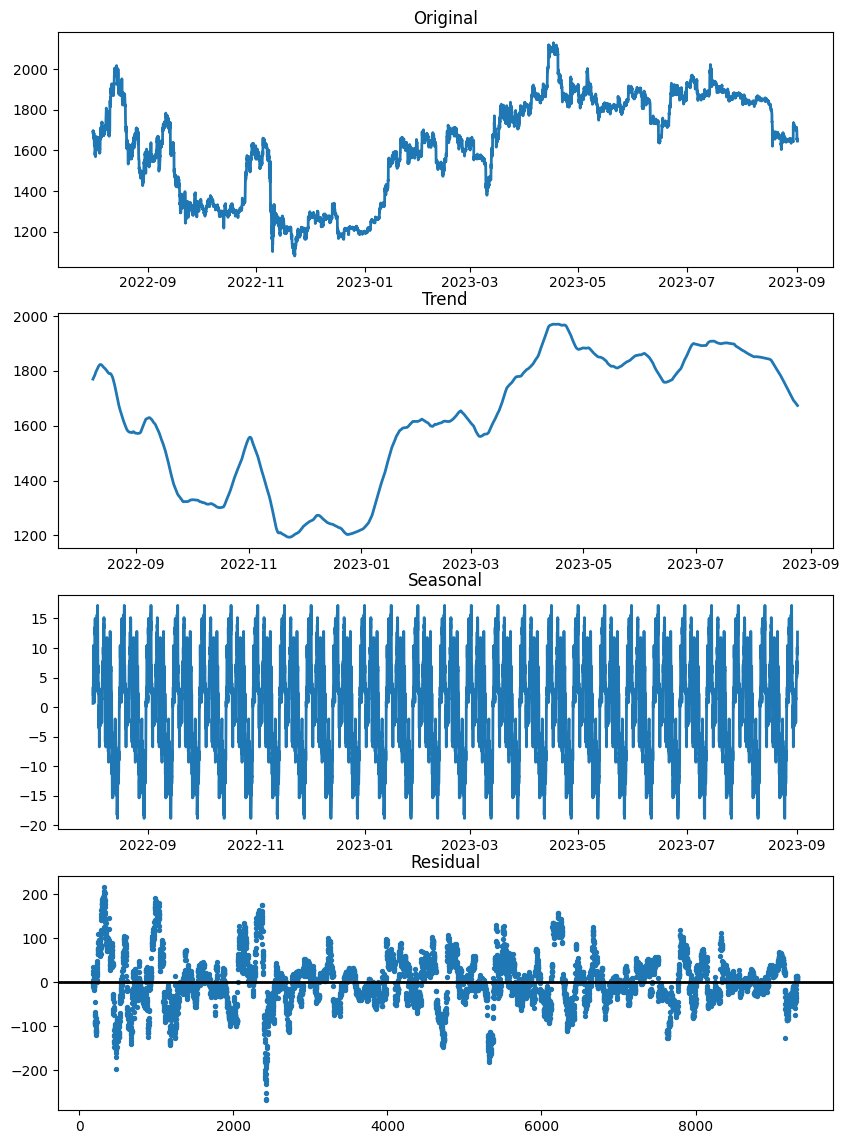

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# file_list=['BTC-all','BTCUSDT-1h','ETH-all','ETHUSDT-1h']
file_list=['ETHUSDT-1h']
seasonal_period_list=[360]


for file in file_list:
    for seasonal_period in seasonal_period_list:
        # google stock price is daily, so
        df=pd.read_csv('../Data/'+file+'.csv')        
        #df['Close'] = np.log(df['Close'])
        
        df["Date"] = pd.to_datetime(df["Date"])
        # Decompose the 'Close' column #multiplicative or additive
        Mmodel='additive'
        decomposition = seasonal_decompose(df['Close'], model=Mmodel, period=seasonal_period)

        # Extract the components
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid

        # Plot the components
        fig, axes = plt.subplots(4, 1, figsize=(10, 14))  # Set the figure size

        # Plot the original series
        axes[0].plot(df["Date"],df['Close'], linewidth=2)  # Set the line width (point size)
        axes[0].set_title('Original')

        # Plot the trend component
        axes[1].plot(df["Date"],trend, linewidth=2)
        axes[1].set_title('Trend')

        # Plot the seasonal component
        axes[2].plot(df["Date"],seasonal, linewidth=2)
        axes[2].set_title('Seasonal')

        # Plot the residual component
        axes[3].scatter(residual.index, residual, s=8)
        axes[3].axhline(y=0, color='k', linestyle='-', linewidth=2)  # Horizontal line at y=0
        axes[3].set_title('Residual')

        
        
        fig_Name=f'figure/{file} P{str(seasonal_period)} {Mmodel} TimeSeries.jpg'
        plt.savefig(fig_Name)
        plt.show()

In [6]:
# google stock price is daily, so
df=pd.read_csv('../Data/BTCUSDT-5m-2023-08.csv')        
#df['Close'] = np.log(df['Close'])



df["open_time"] = pd.to_datetime(df["open_time"])
# Decompose the 'Close' column #multiplicative or additive
decomposition = seasonal_decompose(df['Close'], model='additive', period=288)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
fig, axes = plt.subplots(4, 1, figsize=(12, 14))  # Set the figure size

# Plot the original series
axes[0].plot(df["open_time"],df['Close'], linewidth=2)  # Set the line width (point size)
axes[0].set_title('Original')

# Plot the trend component
axes[1].plot(df["open_time"],trend, linewidth=2)
axes[1].set_title('Trend')

# Plot the seasonal component
axes[2].plot(df["open_time"],seasonal, linewidth=2)
axes[2].set_title('Seasonal')

# Plot the residual component
axes[3].scatter(residual.index, residual, s=8)
axes[3].axhline(y=0, color='k', linestyle='-', linewidth=2)  # Horizontal line at y=0
axes[3].set_title('Residual')

plt.tight_layout()
plt.show()
# fig_Name='figure/'+file+str(seasonal_period)+' TimeSeries.jpg'
# plt.savefig(fig_Name)

FileNotFoundError: [Errno 2] No such file or directory: '../Data/BTCUSDT-5m-2023-08.csv'